# Install the required packages

In [1]:
!pip install yfinance stable-baselines3 gym numpy pandas matplotlib
!pip install ta-lib

  Using cached TA-Lib-0.4.32.tar.gz (368 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build ta-lib


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [671 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\talib
  copying talib\abstract.py -> build\lib.win-amd64-cpython-312\talib
  copying talib\deprecated.py -> build\lib.win-amd64-cpython-312\talib
  copying talib\stream.py -> build\lib.win-amd64-cpython-312\talib
  copying talib\__init__.py -> build\lib.win-amd64-cpython-312\talib
  running build_ext
  building 'talib._ta_lib' extension
  creating build\temp.win-amd64-cpython-312
  creating build\temp.win-amd64-cpython-312\Release
  creating build\temp.win-amd64-cpython-312\Release\talib
  "C:\Program Files (x86)\Microsoft Visual Studio\2022\BuildTools\VC\Tools\MSVC\14.41.34120\bin\HostX86\x64\cl.exe" /c /nologo /O2 /W3 /GL /DNDEBUG /MD -Ic:\ta-lib\c\include -IC:\Users\faizh\AppData\Local\Temp\pip-build-env-2x1nvhpl\overlay\Lib\site-packages\numpy

# Download the stocks from NIFTY100, and create separate .csv files for each ticker

In [2]:
import yfinance as yf
import pandas as pd

tickers = [
    "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "ICICIBANK.NS", "INFY.NS", "HINDUNILVR.NS", 
    "KOTAKBANK.NS", "SBIN.NS", "BHARTIARTL.NS", "HDFC.NS", "ITC.NS", "BAJFINANCE.NS", 
    "LT.NS", "AXISBANK.NS", "ASIANPAINT.NS", "HCLTECH.NS", "MARUTI.NS", "WIPRO.NS", 
    "ONGC.NS", "SUNPHARMA.NS", "ULTRACEMCO.NS", "NTPC.NS", "POWERGRID.NS", "NESTLEIND.NS", 
    "M&M.NS", "BAJAJFINSV.NS", "TITAN.NS", "INDUSINDBK.NS", "JSWSTEEL.NS", "HEROMOTOCO.NS", 
    "TATASTEEL.NS", "TECHM.NS", "DRREDDY.NS", "BRITANNIA.NS", "ADANIGREEN.NS", "DIVISLAB.NS", 
    "EICHERMOT.NS", "HDFCLIFE.NS", "ADANIPORTS.NS", "COALINDIA.NS", "GRASIM.NS", 
    "CIPLA.NS", "BAJAJ-AUTO.NS", "TATAMOTORS.NS", "BPCL.NS", "IOC.NS", "SHREECEM.NS", 
    "GAIL.NS", "ADANIENT.NS", "DABUR.NS", "SBILIFE.NS", "DMART.NS", "HINDALCO.NS", 
    "ICICIGI.NS", "PIDILITIND.NS", "SIEMENS.NS", "HAVELLS.NS", "LUPIN.NS", "ADANITRANS.NS", 
    "TATAPOWER.NS", "ADANITRANS.NS", "GODREJCP.NS", "COLPAL.NS", "AMBUJACEM.NS", 
    "BERGEPAINT.NS", "IDFCFIRSTB.NS", "MCDOWELL-N.NS", "BIOCON.NS", "BOSCHLTD.NS", 
    "MARICO.NS", "ICICIPRULI.NS", "NAUKRI.NS", "TORNTPHARM.NS", "UPL.NS", "BANDHANBNK.NS", 
    "SRTRANSFIN.NS", "MOTHERSUMI.NS", "PETRONET.NS", "JINDALSTEL.NS", "GODREJPROP.NS", 
    "ZOMATO.NS", "PGHH.NS", "TATACONSUM.NS", "PFC.NS", "LTI.NS", "INDIGO.NS", "BANKBARODA.NS", 
    "VEDL.NS", "TATAELXSI.NS", "CHOLAFIN.NS", "ABB.NS", "HDFCAMC.NS", "WHIRLPOOL.NS", 
    "IGL.NS", "JSWENERGY.NS", "DLF.NS", "BALKRISIND.NS", "CUMMINSIND.NS", "SRF.NS"
]

def get_data(tickers):
    stock_data = {}
    for ticker in tickers:
        df = yf.download(ticker, start="2015-01-01", end="2024-08-14")
        stock_data[ticker] = df
    return stock_data


stock_data = get_data(tickers)

for ticker, df in stock_data.items():
    df.to_csv(f'{ticker}.csv')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HDFC.NS']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*

# Load the data from the CSV files

In [3]:
import pandas as pd

tickers = [
    "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "ICICIBANK.NS", "INFY.NS", "HINDUNILVR.NS", 
    "KOTAKBANK.NS", "SBIN.NS", "BHARTIARTL.NS", "HDFC.NS", "ITC.NS", "BAJFINANCE.NS", 
    "LT.NS", "AXISBANK.NS", "ASIANPAINT.NS", "HCLTECH.NS", "MARUTI.NS", "WIPRO.NS", 
    "ONGC.NS", "SUNPHARMA.NS", "ULTRACEMCO.NS", "NTPC.NS", "POWERGRID.NS", "NESTLEIND.NS", 
    "M&M.NS", "BAJAJFINSV.NS", "TITAN.NS", "INDUSINDBK.NS", "JSWSTEEL.NS", "HEROMOTOCO.NS", 
    "TATASTEEL.NS", "TECHM.NS", "DRREDDY.NS", "BRITANNIA.NS", "ADANIGREEN.NS", "DIVISLAB.NS", 
    "EICHERMOT.NS", "HDFCLIFE.NS", "ADANIPORTS.NS", "COALINDIA.NS", "GRASIM.NS", 
    "CIPLA.NS", "BAJAJ-AUTO.NS", "TATAMOTORS.NS", "BPCL.NS", "IOC.NS", "SHREECEM.NS", 
    "GAIL.NS", "ADANIENT.NS", "DABUR.NS", "SBILIFE.NS", "DMART.NS", "HINDALCO.NS", 
    "ICICIGI.NS", "PIDILITIND.NS", "SIEMENS.NS", "HAVELLS.NS", "LUPIN.NS", "ADANITRANS.NS", 
    "TATAPOWER.NS", "ADANITRANS.NS", "GODREJCP.NS", "COLPAL.NS", "AMBUJACEM.NS", 
    "BERGEPAINT.NS", "IDFCFIRSTB.NS", "MCDOWELL-N.NS", "BIOCON.NS", "BOSCHLTD.NS", 
    "MARICO.NS", "ICICIPRULI.NS", "NAUKRI.NS", "TORNTPHARM.NS", "UPL.NS", "BANDHANBNK.NS", 
    "SRTRANSFIN.NS", "MOTHERSUMI.NS", "PETRONET.NS", "JINDALSTEL.NS", "GODREJPROP.NS", 
    "ZOMATO.NS", "PGHH.NS", "TATACONSUM.NS", "PFC.NS", "LTI.NS", "INDIGO.NS", "BANKBARODA.NS", 
    "VEDL.NS", "TATAELXSI.NS", "CHOLAFIN.NS", "ABB.NS", "HDFCAMC.NS", "WHIRLPOOL.NS", 
    "IGL.NS", "JSWENERGY.NS", "DLF.NS", "BALKRISIND.NS", "CUMMINSIND.NS", "SRF.NS"
]

benchmark = '^CNX100'

stock_data = {}
for ticker in tickers:
    df = pd.read_csv(f'{ticker}.csv', index_col='Date', parse_dates=True)
    stock_data[ticker] = df


training_data_time_range = ('2015-01-01', '2022-12-31')
validation_data_time_range = ('2023-01-01', '2023-12-31')
test_data_time_range = ('2024-01-01', '2024-08-14')

training_data = {}
validation_data = {}
test_data = {}

for ticker, df in stock_data.items():
    training_data[ticker] = df.loc[training_data_time_range[0]:training_data_time_range[1]]
    validation_data[ticker] = df.loc[validation_data_time_range[0]:validation_data_time_range[1]]
    test_data[ticker] = df.loc[test_data_time_range[0]:test_data_time_range[1]]

ticker = 'RELIANCE.NS'
print(f'Training data shape for {ticker}: {training_data[ticker].shape}')
print(f'Validation data shape for {ticker}: {validation_data[ticker].shape}')
print(f'Test data shape for {ticker}: {test_data[ticker].shape}')

stock_data['RELIANCE.NS'].head()

Training data shape for RELIANCE.NS: (1976, 6)
Validation data shape for RELIANCE.NS: (245, 6)
Test data shape for RELIANCE.NS: (151, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,405.186554,407.792389,403.975037,405.917999,382.812134,1481821
2015-01-02,406.009430,409.643921,404.272217,404.843658,381.799011,3665683
2015-01-05,404.592224,407.289520,399.609100,400.409149,377.616913,5051970
2015-01-06,397.734741,399.106232,380.362396,382.236786,360.478973,9313990
2015-01-07,382.693970,392.614471,382.648254,390.557220,368.325745,10360156


# 4. Add technical indicators to the data

Function to add technical indicators to the data:

In [4]:
import pandas as pd
import numpy as np

def add_technical_indicators(df):
    # calculate RSI 14 
    delta = df['Close'].diff()
    up = delta.where(delta > 0, 0)
    down = -delta.where(delta < 0, 0)
    rs = up.rolling(window=14).mean() / down.rolling(window=14).mean()
    df['RSI'] = 100 - (100 / (1 + rs))

    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    tp = (df['High'] + df['Low'] + df['Close']) / 3
    sma_tp = tp.rolling(window=20).mean()
    mean_dev = tp.rolling(window=20).apply(lambda x: np.mean(np.abs(x - x.mean())))
    df['CCI'] = (tp - sma_tp) / (0.015 * mean_dev)
    
    high_diff = df['High'].diff()
    low_diff = df['Low'].diff()
    df['+DM'] = np.where((high_diff > low_diff) & (high_diff > 0), high_diff, 0)
    df['-DM'] = np.where((low_diff > high_diff) & (low_diff > 0), low_diff, 0)
    tr = pd.concat([df['High'] - df['Low'], np.abs(df['High'] - df['Close'].shift(1)), np.abs(df['Low'] - df['Close'].shift(1))], axis=1).max(axis=1)
    atr = tr.ewm(span=14, adjust=False).mean()
    df['+DI'] = 100 * (df['+DM'].ewm(span=14, adjust=False).mean() / atr)
    df['-DI'] = 100 * (df['-DM'].ewm(span=14, adjust=False).mean() / atr)
    dx = 100 * np.abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])
    df['ADX'] = dx.ewm(span=14, adjust=False).mean()

    df.dropna(inplace=True)

    df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'Signal', 'RSI', 'CCI', 'ADX']]

    return df


add technical indicators to the data

In [5]:
training_data.items()

dict_items([('RELIANCE.NS',                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2015-01-01   405.186554   407.792389   403.975037   405.917999   382.812134   
2015-01-02   406.009430   409.643921   404.272217   404.843658   381.799011   
2015-01-05   404.592224   407.289520   399.609100   400.409149   377.616913   
2015-01-06   397.734741   399.106232   380.362396   382.236786   360.478973   
2015-01-07   382.693970   392.614471   382.648254   390.557220   368.325745   
...                 ...          ...          ...          ...          ...   
2022-12-26  2321.113525  2346.265137  2300.484375  2329.697266  2321.496582   
2022-12-27  2335.189209  2352.541504  2321.574951  2348.757324  2340.489746   
2022-12-28  2342.573242  2353.464600  2327.343750  2348.526611  2340.259766   
2022-12-29  2332.420166  2352.633789  2331.035645  2347.465088  2339.201904   
2022-12-30  2349.126465 

In [6]:
for ticker, df in test_data.items():
        print(df)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-01-01  2580.550049  2606.850098  2573.149902  2590.250000  2590.250000   
2024-01-02  2585.000000  2615.000000  2573.000000  2611.699951  2611.699951   
2024-01-03  2610.000000  2634.000000  2577.199951  2583.300049  2583.300049   
2024-01-04  2588.000000  2609.850098  2579.100098  2596.649902  2596.649902   
2024-01-05  2602.899902  2619.850098  2598.000000  2607.699951  2607.699951   
...                 ...          ...          ...          ...          ...   
2024-08-07  2938.000000  2945.000000  2923.000000  2929.649902  2929.649902   
2024-08-08  2915.050049  2930.000000  2891.850098  2898.250000  2898.250000   
2024-08-09  2920.000000  2953.000000  2912.000000  2948.600098  2948.600098   
2024-08-12  2940.000000  2946.000000  2915.500000  2921.250000  2921.250000   
2024-08-13  2921.500000  2940.149902  2916.000000  2

In [7]:

# add technical indicators to the training data for each stock
for ticker, df in training_data.items():
    training_data[ticker] = add_technical_indicators(df)


C:\Users\faizh\AppData\Local\Temp\ipykernel_13500\2952124214.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = 100 - (100 / (1 + rs))
C:\Users\faizh\AppData\Local\Temp\ipykernel_13500\2952124214.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
C:\Users\faizh\AppData\Local\Temp\ipykernel_13500\2952124214.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [8]:

# add technical indicators to the validation data for each stock
for ticker, df in validation_data.items():
    validation_data[ticker] = add_technical_indicators(df)

C:\Users\faizh\AppData\Local\Temp\ipykernel_13500\2952124214.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = 100 - (100 / (1 + rs))
C:\Users\faizh\AppData\Local\Temp\ipykernel_13500\2952124214.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
C:\Users\faizh\AppData\Local\Temp\ipykernel_13500\2952124214.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [9]:

# add technical indicators to the test data for each stock
for ticker, df in test_data.items():
    test_data[ticker] = add_technical_indicators(df)

C:\Users\faizh\AppData\Local\Temp\ipykernel_13500\2952124214.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = 100 - (100 / (1 + rs))
C:\Users\faizh\AppData\Local\Temp\ipykernel_13500\2952124214.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
C:\Users\faizh\AppData\Local\Temp\ipykernel_13500\2952124214.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [10]:

# print the first 5 rows of the data
print('Shape of training data for AAPL:', training_data['RELIANCE.NS'].shape)
print('Shape of validation data for AAPL:', validation_data['RELIANCE.NS'].shape)
print('Shape of test data for AAPL:', test_data['RELIANCE.NS'].shape)

Shape of training data for AAPL: (1957, 10)
Shape of validation data for AAPL: (226, 10)
Shape of test data for AAPL: (132, 10)


# 5. Create Trading Environment

In [11]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pandas as pd

class StockTradingEnv(gym.Env):
    metadata = {'render_modes': ['human']}
    
    def __init__(self, stock_data):
        super(StockTradingEnv, self).__init__()
        
        # Remove any empty DataFrames
        self.stock_data = {ticker: df for ticker, df in stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())
        
        if not self.tickers:
            raise ValueError("All provided stock data is empty")
        
        # Calculate the size of one stock's data
        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)
        
        # Define action and observation space
        self.action_space = spaces.Box(low=-1, high=1, shape=(len(self.tickers),), dtype=np.float32)
        
        # Observation space: price data for each stock + balance + shares held + net worth + max net worth
        self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)
        
        # Initialize account balance
        self.initial_balance = 1000
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        
        # Set the current step
        self.current_step = 0
        
        # Calculate the minimum length of data across all stocks
        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)
    
    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        self.current_step = 0
        return self._next_observation(), {}
    
    def _next_observation(self):
        frame = np.zeros(self.obs_shape)
        
        idx = 0
        for ticker in self.tickers:
            df = self.stock_data[ticker]
            if self.current_step < len(df):
                frame[idx:idx+self.n_features] = df.iloc[self.current_step].values
            elif len(df) > 0:
                frame[idx:idx+self.n_features] = df.iloc[-1].values
            idx += self.n_features
        
        frame[-4-len(self.tickers)] = self.balance
        frame[-3-len(self.tickers):-3] = [self.shares_held[ticker] for ticker in self.tickers]
        frame[-3] = self.net_worth
        frame[-2] = self.max_net_worth
        frame[-1] = self.current_step
        
        return frame
    
    def step(self, actions):
        self.current_step += 1
        
        if self.current_step > self.max_steps:
            return self._next_observation(), 0, True, False, {}
        
        current_prices = {}
        for i, ticker in enumerate(self.tickers):
            current_prices[ticker] = self.stock_data[ticker].iloc[self.current_step]['Close']
            action = actions[i]
            
            if action > 0:  # Buy
                shares_to_buy = int(self.balance * action / current_prices[ticker])
                cost = shares_to_buy * current_prices[ticker]
                self.balance -= cost
                self.shares_held[ticker] += shares_to_buy
            elif action < 0:  # Sell
                shares_to_sell = int(self.shares_held[ticker] * abs(action))
                sale = shares_to_sell * current_prices[ticker]
                self.balance += sale
                self.shares_held[ticker] -= shares_to_sell
                self.total_shares_sold[ticker] += shares_to_sell
                self.total_sales_value[ticker] += sale
        
        self.net_worth = self.balance + sum(self.shares_held[ticker] * current_prices[ticker] for ticker in self.tickers)
        self.max_net_worth = max(self.net_worth, self.max_net_worth)
        
        reward = self.net_worth - self.initial_balance
        done = self.net_worth <= 0 or self.current_step >= self.max_steps
        
        obs = self._next_observation()
        return obs, reward, done, False, {}
    
    def render(self, mode='human'):
        profit = self.net_worth - self.initial_balance
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance:.2f}')
        for ticker in self.tickers:
            print(f'{ticker} Shares held: {self.shares_held[ticker]}')
        print(f'Net worth: {self.net_worth:.2f}')
        print(f'Profit: {profit:.2f}')

    def close(self):
        pass

    def update_stock_data(self, new_stock_data):
        
        self.stock_data = {ticker: df for ticker, df in new_stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())

        if not self.tickers:
            raise ValueError("Error")

        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)

        self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)

        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)

        self.reset()


# 6. Training Model - Ensemble + PPO + A2C + DDPG

## Define Functions

Define Agents ( Ensemble + PPO + A2C + DDPG)

In [12]:
from stable_baselines3 import PPO, A2C, DDPG
from stable_baselines3.common.vec_env import DummyVecEnv

# Define Ensemble Agent
class EnsembleAgent:
    def __init__(self, ppo_model, a2c_model, ddpg_model):
        self.ppo_model = ppo_model
        self.a2c_model = a2c_model
        self.ddpg_model = ddpg_model
    
    def predict(self, obs):
        ppo_action, _ = self.ppo_model.predict(obs)
        a2c_action, _ = self.a2c_model.predict(obs)
        ddpg_action, _ = self.ddpg_model.predict(obs)
        
        # Average the actions
        ensemble_action = np.mean([ppo_action, a2c_action, ddpg_action], axis=0)
        return ensemble_action
    
# Define PPO Agent
class PPOAgent:
    def __init__(self, env, total_timesteps):
        self.model = PPO("MlpPolicy", env, verbose=1, device="cuda")
        self.model.learn(total_timesteps=total_timesteps)
    
    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action
    
# Define A2C Agent
class A2CAgent:
    def __init__(self, env, total_timesteps):
        self.model = A2C("MlpPolicy", env, verbose=1, device="cuda")
        self.model.learn(total_timesteps=total_timesteps)
    
    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action
    
# Define DDPG Agent
class DDPGAgent:
    def __init__(self, env, total_timesteps):
        self.model = DDPG("MlpPolicy", env, verbose=1, device="cuda")
        self.model.learn(total_timesteps=total_timesteps)
    
    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action

Function to Create Environment + Train 4 Agents: PPO, A2C, DDPG and Ensemble ( PPO + A2C + DDPG )

In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to create the environment and train the agents
def create_env_and_train_agents(data, total_timesteps):
    # Create the environment using DummyVecEnv with training data
    env = DummyVecEnv([lambda: StockTradingEnv(data)])

    # Train PPO Agent
    ppo_agent = PPOAgent(env, total_timesteps)

    # Train A2C Agent
    a2c_agent = A2CAgent(env, total_timesteps)

    # Train DDPG Agent
    ddpg_agent = DDPGAgent(env, total_timesteps)

    # Train the ensemble agent
    ensemble_agent = EnsembleAgent(ppo_agent.model, a2c_agent.model, ddpg_agent.model)
    
    return env, ppo_agent, a2c_agent, ddpg_agent, ensemble_agent

Function to visualiza Portfolio changes, Portfolio Net Worth and Multiple Portfolio Net Worth

In [14]:
import matplotlib.pyplot as plt

# Function to visualize portfolio changes
def visualize_portfolio(steps, balances, net_worths, shares_held, tickers, show_balance=True, show_net_worth=True, show_shares_held=True):
    fig, axs = plt.subplots(3, figsize=(12, 18))

    # Plot the balance
    if show_balance:
        axs[0].plot(steps, balances, label='Balance')
        axs[0].set_title('Balance Over Time')
        axs[0].set_xlabel('Steps')
        axs[0].set_ylabel('Balance')
        axs[0].legend()

    # Plot the net worth
    if show_net_worth:
        axs[1].plot(steps, net_worths, label='Net Worth', color='orange')
        axs[1].set_title('Net Worth Over Time')
        axs[1].set_xlabel('Steps')
        axs[1].set_ylabel('Net Worth')
        axs[1].legend()

    # Plot the shares held
    if show_shares_held:
        for ticker in tickers:
            axs[2].plot(steps, shares_held[ticker], label=f'Shares Held: {ticker}')
        axs[2].set_title('Shares Held Over Time')
        axs[2].set_xlabel('Steps')
        axs[2].set_ylabel('Shares Held')
        axs[2].legend()

    plt.tight_layout()
    plt.show()

# function to visualize the portfolio net worth
def visualize_portfolio_net_worth(steps, net_worths):
    plt.figure(figsize=(12, 6))
    plt.plot(steps, net_worths, label='Net Worth', color='orange')
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

# function to visualize the multiple portfolio net worths ( same chart )
def visualize_multiple_portfolio_net_worth(steps, net_worths_list, labels):
    plt.figure(figsize=(12, 6))
    for i, net_worths in enumerate(net_worths_list):
        plt.plot(steps, net_worths, label=labels[i])
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

Function Visualize the Agent's performance ( Ensemble )

In [15]:
def test_agent(env, agent, stock_data, n_tests=1000, visualize=False):
    metrics = {
        'steps': [],
        'balances': [],
        'net_worths': [],
        'shares_held': {ticker: [] for ticker in stock_data.keys()}
    }

    # Reset the environment before starting the tests
    obs = env.reset()

    for i in range(n_tests):
        metrics['steps'].append(i)
        action = agent.predict(obs)
        obs, rewards, dones, infos = env.step(action)
        if visualize:
            env.render()

        # Track metrics
        metrics['balances'].append(env.get_attr('balance')[0])
        metrics['net_worths'].append(env.get_attr('net_worth')[0])
        env_shares_held = env.get_attr('shares_held')[0]

        # Update shares held for each ticker
        for ticker in stock_data.keys():
            if ticker in env_shares_held:
                metrics['shares_held'][ticker].append(env_shares_held[ticker])
            else:
                metrics['shares_held'][ticker].append(0)  # Append 0 if ticker is not found

        if dones:
            obs = env.reset()
            
    return metrics


Function to Test and Visualize the Agent's performance ( Ensemble Agent )

In [16]:
def test_and_visualize_agents(env, agents, training_data, n_tests=1000):
    metrics = {}
    for agent_name, agent in agents.items():
        print(f"Testing {agent_name}...")
        metrics[agent_name] = test_agent(env, agent, training_data, n_tests=n_tests, visualize=True)
        print(f"Done testing {agent_name}!")
    
    print('-'*50)
    print('All agents tested!')
    print('-'*50)

    # Extract net worths for visualization
    net_worths = [metrics[agent_name]['net_worths'] for agent_name in agents.keys()]
    steps = next(iter(metrics.values()))['steps']  # Assuming all agents have the same step count for simplicity

    # Visualize the performance metrics of multiple agents
    visualize_multiple_portfolio_net_worth(steps, net_worths, list(agents.keys()))

Function to compare the performance of the 4 Agents : Returns, Standard Deviation, Sharpe Ratio

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compare_and_plot_agents(agents_metrics, labels):
    # Function to compare returns, standard deviation, and sharpe ratio of agents
    def compare_agents(agents_metrics, labels):
        returns = []
        stds = []
        sharpe_ratios = []

        for metrics in agents_metrics:
            returns.append(np.mean(metrics['net_worths']))
            stds.append(np.std(metrics['net_worths']))
            sharpe_ratios.append(np.mean(metrics['net_worths']) / np.std(metrics['net_worths']))

        df = pd.DataFrame({
            'Agent': labels,
            'Return': returns,
            'Standard Deviation': stds,
            'Sharpe Ratio': sharpe_ratios
        })

        return df

    # Compare agents
    df = compare_agents(agents_metrics, labels)
    # Sort the dataframe by sharpe ratio
    df_sorted = df.sort_values(by='Sharpe Ratio', ascending=False)

    # Display the dataframe
    display(df_sorted)

    # Plot bar chart for sharpe ratio
    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted['Agent'], df_sorted['Sharpe Ratio'])
    plt.title('Sharpe Ratio Comparison')
    plt.xlabel('Agent')
    plt.ylabel('Sharpe Ratio')
    plt.show()

## Run 

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 95   |
|    iterations      | 1    |
|    time_elapsed    | 21   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 2           |
|    time_elapsed         | 44          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.019695437 |
|    clip_fraction        | 0.271       |
|    clip_range           | 0.2         |
|    entropy_loss         | -131        |
|    explained_variance   | 4.18e-05    |
|    learning_rate        | 0.0003      |
|    loss                 | 2.4e+06     |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0693     |
|    std                  | 1           |
|    value_loss           | 5.09e+06    |
-----------------

C:\Program Files\Python312\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 8.50GB > 6.12GB
  warnings.warn(


----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 20        |
|    time_elapsed    | 65        |
|    total_timesteps | 1356      |
| train/             |           |
|    actor_loss      | -2.35e+05 |
|    critic_loss     | 2.25e+08  |
|    learning_rate   | 0.001     |
|    n_updates       | 1255      |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 20        |
|    time_elapsed    | 133       |
|    total_timesteps | 2712      |
| train/             |           |
|    actor_loss      | -2.13e+05 |
|    critic_loss     | 3.75e+06  |
|    learning_rate   | 0.001     |
|    n_updates       | 2611      |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 12        |
|    fps             | 20        |
|    time_elapsed   

C:\Program Files\Python312\Lib\site-packages\stable_baselines3\common\vec_env\base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Done testing PPO Agent!
Testing A2C Agent...
Done testing A2C Agent!
Testing DDPG Agent...
Done testing DDPG Agent!
Testing Ensemble Agent...
Done testing Ensemble Agent!
--------------------------------------------------
All agents tested!
--------------------------------------------------


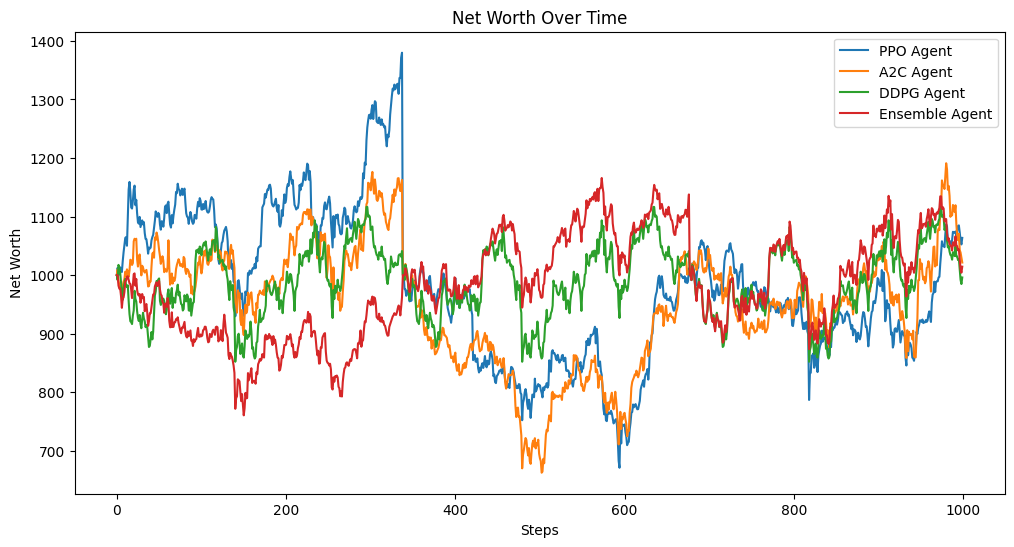

,Agent,Return,Standard Deviation,Sharpe Ratio
3,Ensemble Agent,1001.118408,59.314443,16.878156
2,DDPG Agent,988.781843,58.663628,16.855109
1,A2C Agent,1101.024253,78.325831,14.056975
0,PPO Agent,1010.663000,76.959065,13.132475


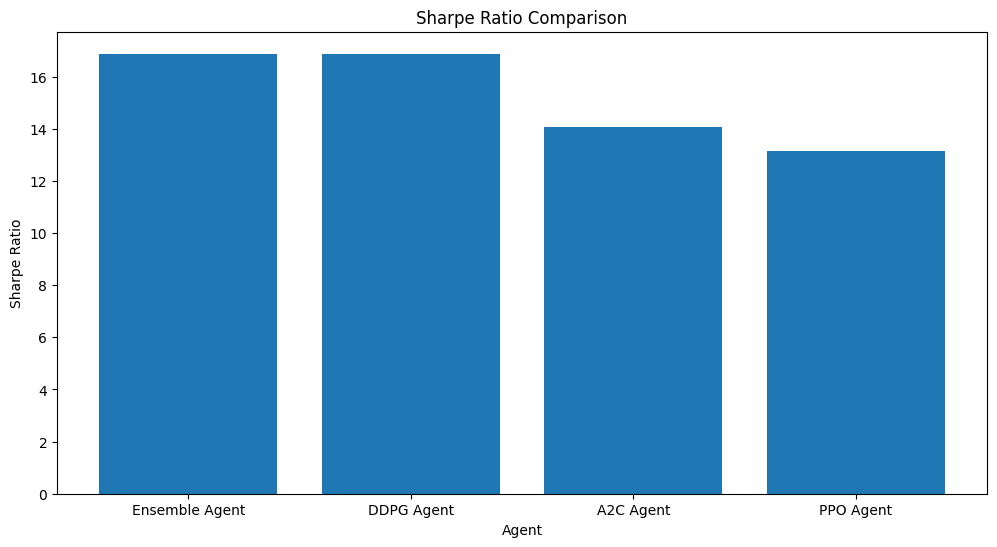

In [18]:
# 1. Create the environment and train the agents
total_timesteps = 30000
env, ppo_agent, a2c_agent, ddpg_agent, ensemble_agent = create_env_and_train_agents(training_data, total_timesteps)

# 2. Test & visualize the agents
n_tests = 1000
agents = {
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,
    'Ensemble Agent': ensemble_agent
}
test_and_visualize_agents(env, agents, training_data, n_tests=n_tests)

# 3. Compare the agents' performance ( returns, standard deviation, and sharpe ratio )
agents_metrics = [test_agent(env, agent, training_data, n_tests=n_tests, visualize=False) for agent in agents.values()]
compare_and_plot_agents(agents_metrics, list(agents.keys()))


# 7. Testing Model - Ensemble + PPO + A2C + DDPG

Testing PPO Agent...


C:\Program Files\Python312\Lib\site-packages\stable_baselines3\common\vec_env\base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Done testing PPO Agent!
Testing A2C Agent...
Done testing A2C Agent!
Testing DDPG Agent...
Done testing DDPG Agent!
Testing Ensemble Agent...
Done testing Ensemble Agent!
--------------------------------------------------
All agents tested!
--------------------------------------------------


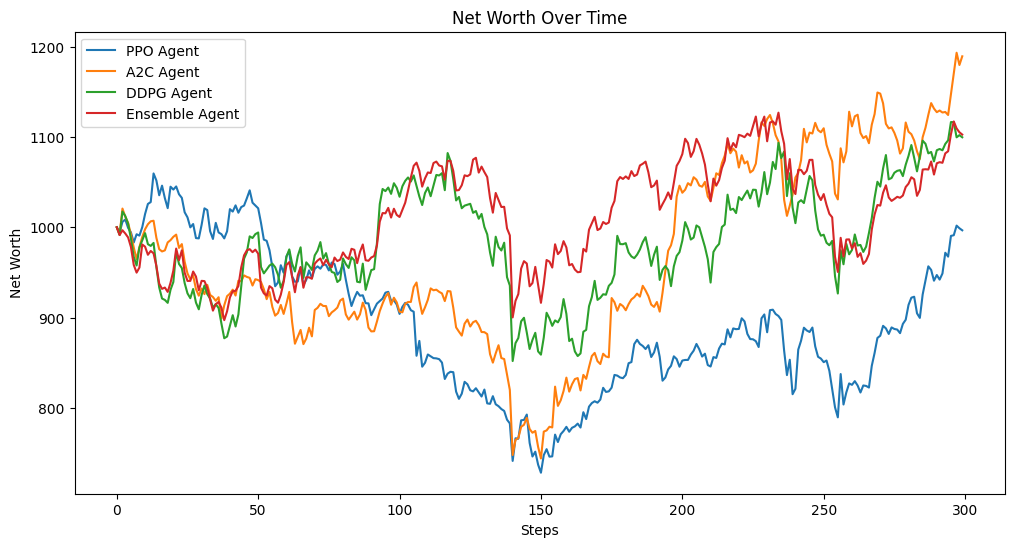

,Agent,Return,Standard Deviation,Sharpe Ratio
3,Ensemble Agent,984.189973,51.571318,19.084057
1,A2C Agent,907.178613,53.326899,17.011651
2,DDPG Agent,984.088003,59.551630,16.524955
0,PPO Agent,955.716821,64.686851,14.774515


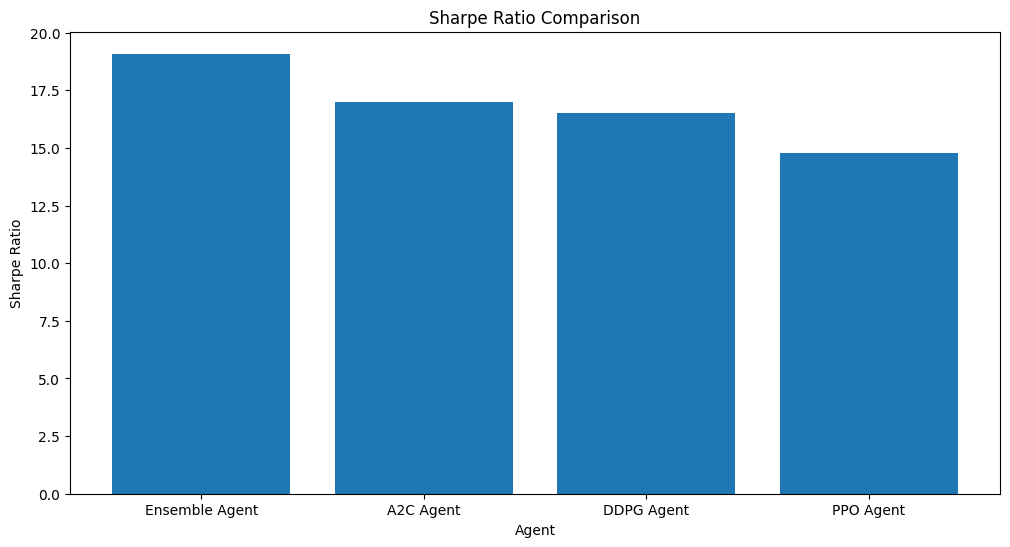

In [19]:
# Create the environment using DummyVecEnv with test data
test_env = DummyVecEnv([lambda: StockTradingEnv(test_data)])

# 2. Test & visualize the agents on the test data
n_tests = 300
test_agents = {
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,
    'Ensemble Agent': ensemble_agent
}
test_and_visualize_agents(env, test_agents, test_data, n_tests=n_tests)

# 3. Compare the agents' performance on the test data ( returns, standard deviation, and sharpe ratio )
test_agents_metrics = [test_agent(env, agent, test_data, n_tests=n_tests, visualize=False) for agent in test_agents.values()]
compare_and_plot_agents(test_agents_metrics, list(test_agents.keys()))

# 7. Validation Model - Ensemble + PPO + A2C + DDPG

Testing PPO Agent...


C:\Program Files\Python312\Lib\site-packages\stable_baselines3\common\vec_env\base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Done testing PPO Agent!
Testing A2C Agent...
Done testing A2C Agent!
Testing DDPG Agent...
Done testing DDPG Agent!
Testing Ensemble Agent...
Done testing Ensemble Agent!
--------------------------------------------------
All agents tested!
--------------------------------------------------


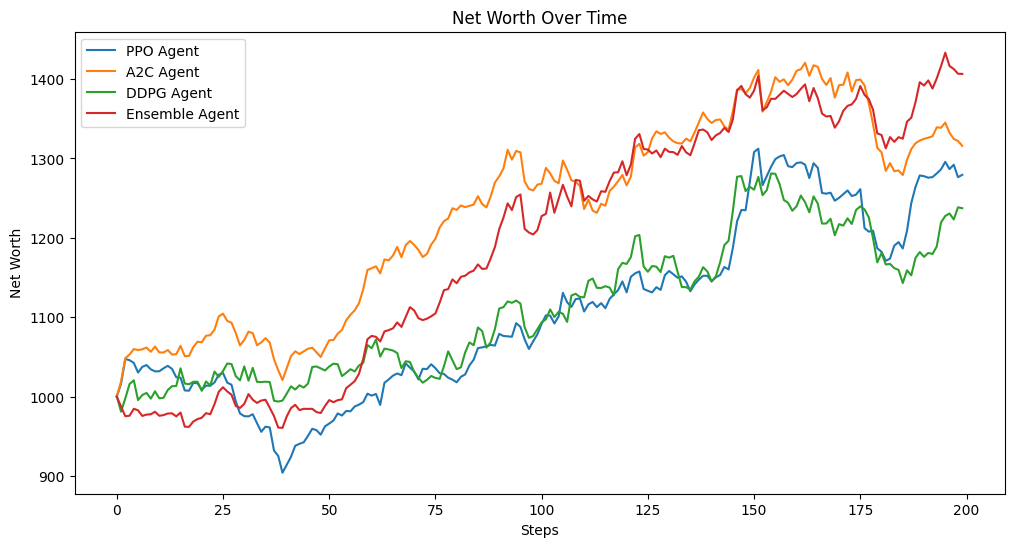

,Agent,Return,Standard Deviation,Sharpe Ratio
1,A2C Agent,1039.206241,39.885265,26.054891
2,DDPG Agent,1112.388770,86.251667,12.897012
3,Ensemble Agent,1173.222815,115.099640,10.193106
0,PPO Agent,1273.573500,145.762491,8.737320


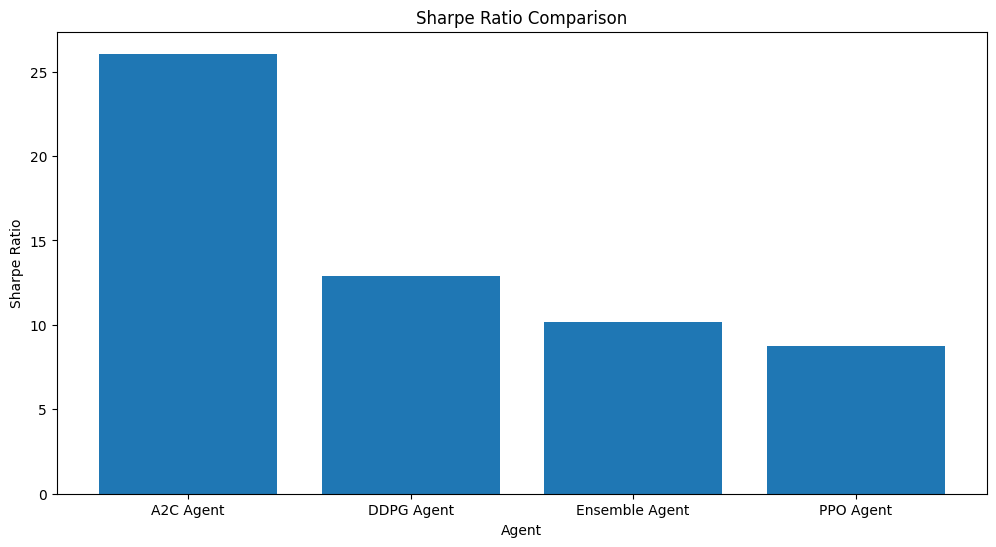

In [20]:
# create validation environment
validation_env = DummyVecEnv([lambda: StockTradingEnv(validation_data)])

# test the agents on the validation data
n_tests = 200
validation_agents = {
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,
    'Ensemble Agent': ensemble_agent
}
test_and_visualize_agents(validation_env, validation_agents, validation_data, n_tests=n_tests)


validation_agents_metrics = [test_agent(validation_env, agent, validation_data, n_tests=n_tests, visualize=False) for agent in validation_agents.values()]
# compare the agents' performance on the validation data
compare_and_plot_agents(validation_agents_metrics, list(validation_agents.keys()))
